[NSynth](https://magenta.tensorflow.org/datasets/nsynth#files) - link to dataset documentation.
[Download](https://magenta.tensorflow.org/datasets/nsynth#files) - link to dataset download.

## Load Libraries and Files

In [14]:
import numpy as np
import pandas as pd
import os
import glob
import librosa
import librosa.display
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import time
import collections
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import random

In [15]:
#Store class names in array
class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal']

#Store source names in array
source_names=['acoustic', 'electronic', 'synthetic']

In [16]:
# Path to the directory containing audio files
directory = 'C:/Users/nikip/Desktop/n-test/nsynth-test/audio'

# Dictionary to store file paths for each instrument type
instrument_files = {
    'bass': [],
    'brass': [],
    'flute': [],
    'guitar': [],
    'keyboard': [],
    'mallet': [],
    'organ': [],
    'reed': [],
    'string': [],
    'synth_lead': [],
    'vocal': []
}

# Iterate over files in the directory and populate the dictionary
for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        instrument = filename.split('_')[0]
        if instrument == 'synth':
            instrument = '_'.join(filename.split('_')[:2])
        instrument_files[instrument].append(os.path.join(directory, filename))

# Select a random sample for each instrument type
random_samples = {}
for instrument, files in instrument_files.items():
    random_sample = random.choice(files)
    random_samples[instrument] = random_sample

In [17]:
bass_file = random_samples['bass']
brass_file = random_samples['brass']
flute_file = random_samples['flute']
guitar_file = random_samples['guitar']
keyboard_file = random_samples['keyboard']
mallet_file = random_samples['mallet']
organ_file = random_samples['organ']
reed_file = random_samples['reed']
string_file = random_samples['string']
synth_lead_file = random_samples['synth_lead']
vocal_file = random_samples['vocal']

print("bass_file:", bass_file)
print("brass_file:", brass_file)
print("flute_file:", flute_file)
print("guitar_file:", guitar_file)
print("keyboard_file:", keyboard_file)
print("mallet_file:", mallet_file)
print("organ_file:", organ_file)
print("reed_file:", reed_file)
print("string_file:", string_file)
print("synth_lead_file:", synth_lead_file)
print("vocal_file:", vocal_file)

bass_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\bass_electronic_018-023-025.wav
brass_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\brass_acoustic_016-075-075.wav
flute_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\flute_synthetic_000-049-100.wav
guitar_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\guitar_acoustic_021-097-075.wav
keyboard_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\keyboard_electronic_001-092-127.wav
mallet_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\mallet_acoustic_062-070-025.wav
organ_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\organ_electronic_057-042-100.wav
reed_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\reed_acoustic_037-050-127.wav
string_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\string_acoustic_071-030-100.wav
synth_lead_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\synth_lead_033-027-100.wav
vocal_file: C:/Users/nikip/Desktop/n-test/nsynth-test/audio\vocal_syntheti

In [18]:
sample_files = [bass_file, brass_file, flute_file, guitar_file, keyboard_file, 
         mallet_file, organ_file, reed_file, string_file, synth_lead_file, vocal_file]

In [19]:
#load the audio as waveform y and store the sampling rate as sr
#To preserve the native sampling rate of the file, use sr=None
y= []
sr = []
for file in sample_files:
    y_out, sr_out = librosa.load(file, sr=None)
    y.append(y_out)
    sr.append(sr_out)

In [20]:
len(y[0])

64000

## Harmonics and Percussion of Wav Files

In [21]:
y_harm= []
y_perc= []

for sample in y:
    y_harm.append(librosa.effects.hpss(sample)[0])
    y_perc.append(librosa.effects.hpss(sample)[1])

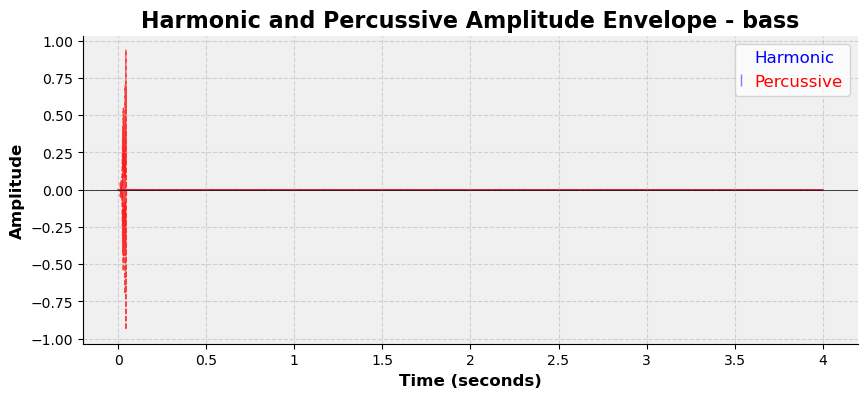

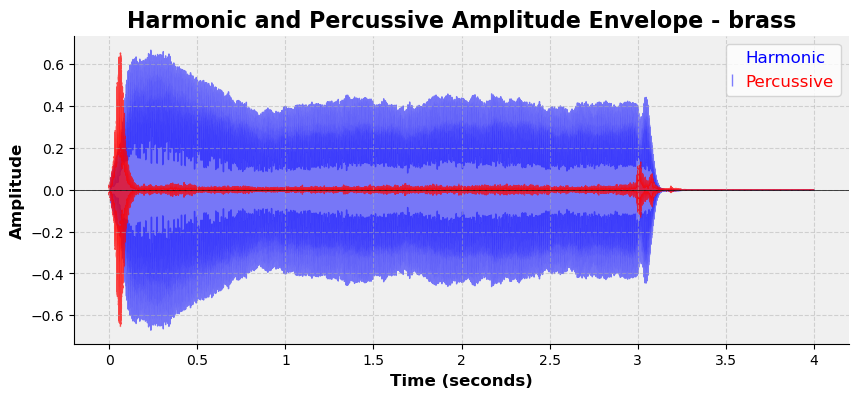

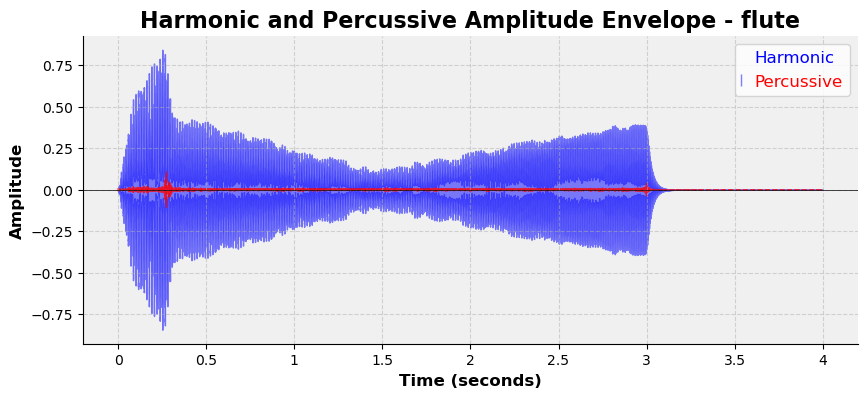

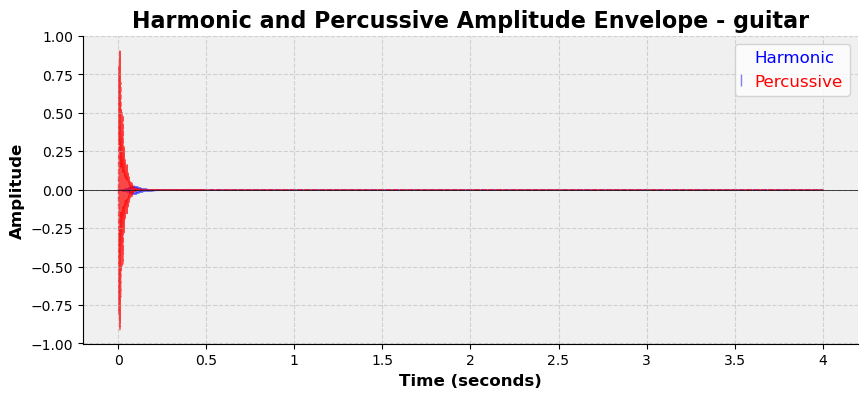

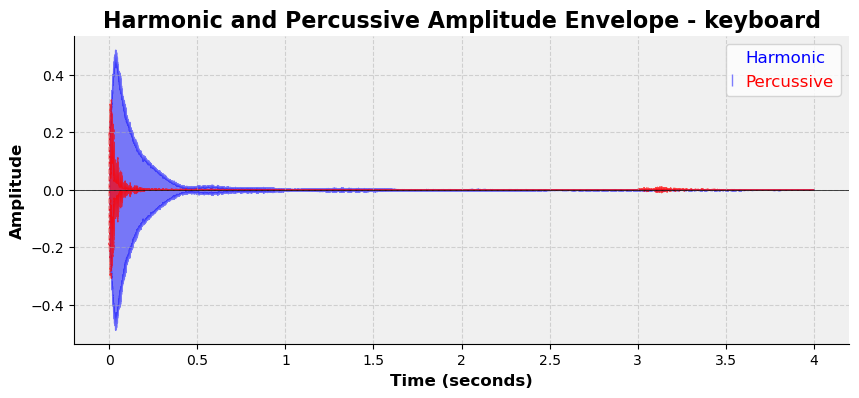

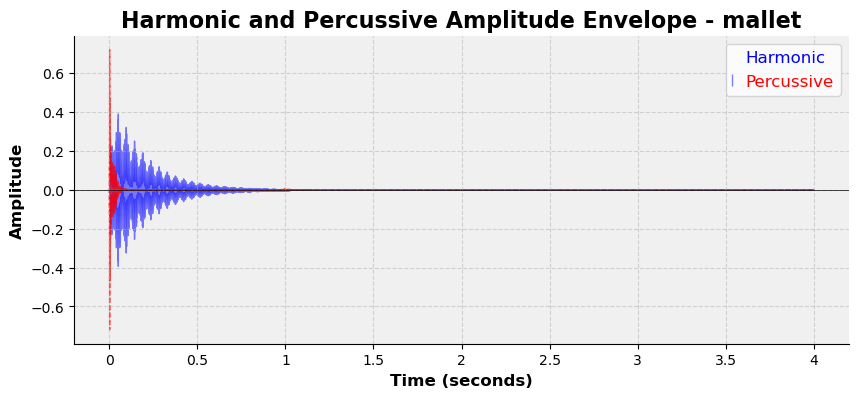

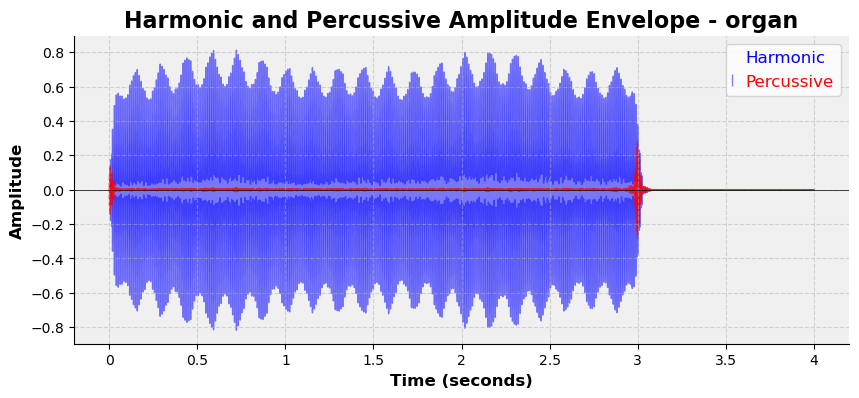

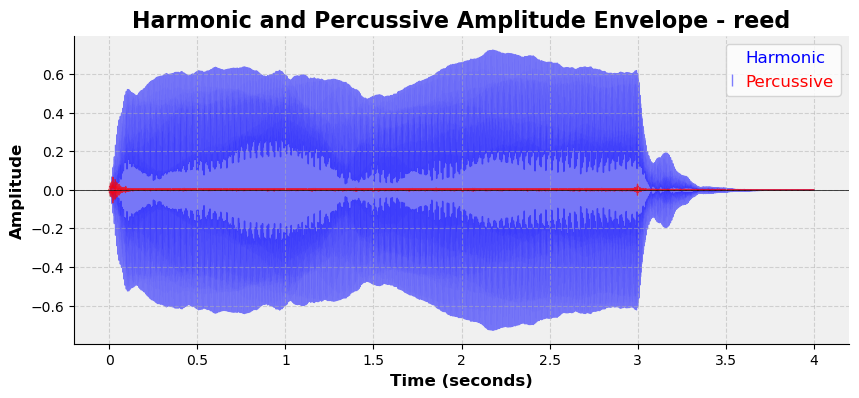

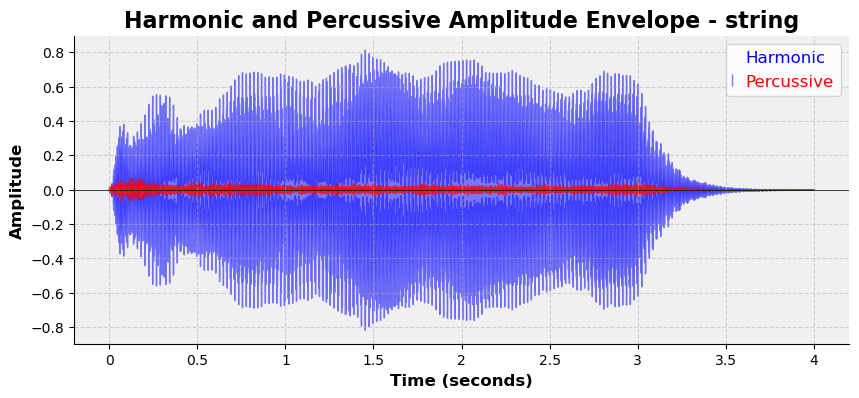

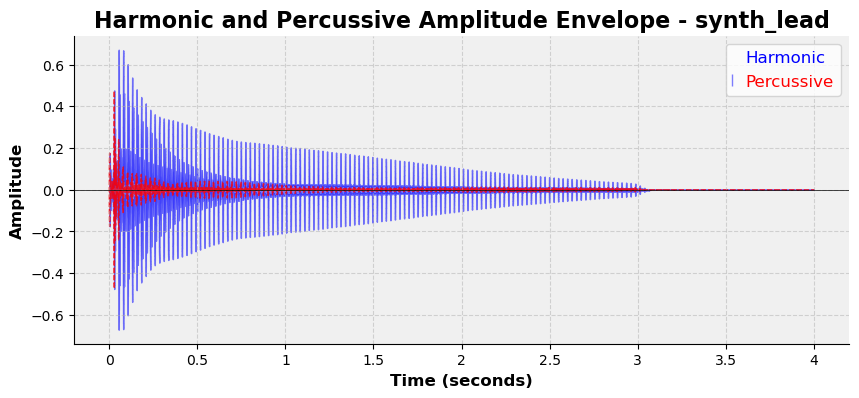

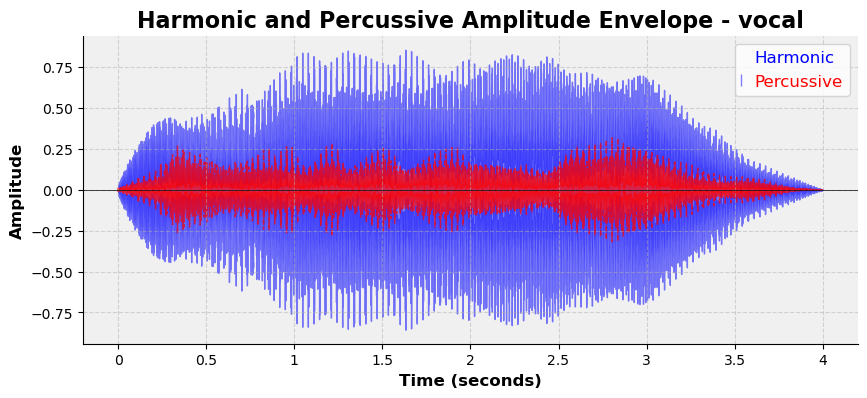

In [22]:
# Iterate over data
for i, j in enumerate(y):
    plt.figure(figsize=(10, 4))  # Adjusting the figure size

    # Plotting the harmonic component with customizations
    librosa.display.waveshow(y_harm[i], sr=sr[i], color='blue', alpha=0.5, linestyle='-', linewidth=1)

    # Plotting the percussive component with customizations
    librosa.display.waveshow(y_perc[i], sr=sr[i], color='red', alpha=0.7, linestyle='--', linewidth=1)

    # Adding legend with customizations
    legend = plt.legend(['Harmonic', 'Percussive'], loc='upper right', fontsize=12, labelcolor=['blue', 'red'], handlelength=0)

    # Adding a title with customizations
    plt.title("Harmonic and Percussive Amplitude Envelope - " + class_names[i], fontsize=16, fontweight='bold')

    # Adding grid for better visualization
    plt.grid(True, linestyle='--', alpha=0.5)

    # Adding labels to X and Y axes
    plt.xlabel('Time (seconds)', fontsize=12, fontweight='bold')
    plt.ylabel('Amplitude', fontsize=12, fontweight='bold')

    # Setting the background color
    plt.gca().set_facecolor('#f0f0f0')

    # Adjusting tick parameters
    plt.tick_params(axis='both', which='major', labelsize=10)

    # Removing spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Adding horizontal line at y=0 for clarity
    plt.axhline(0, color='black', linewidth=0.5)

plt.show()

## Chroma Energy - Color of Wav Files

In [23]:
chromas = []
for y_, sr_ in zip(y, sr):
    chromas.append(librosa.feature.chroma_cens(y=y_, sr=sr_))

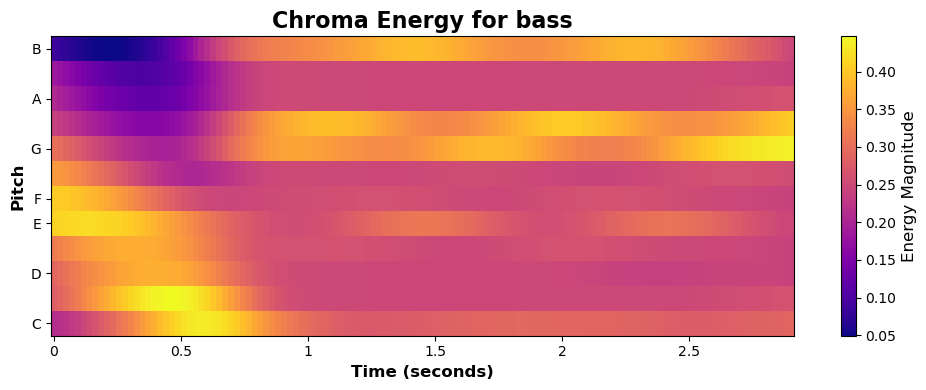

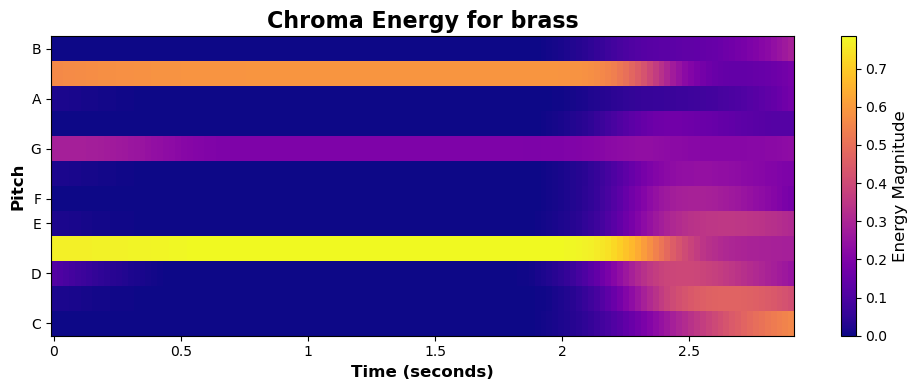

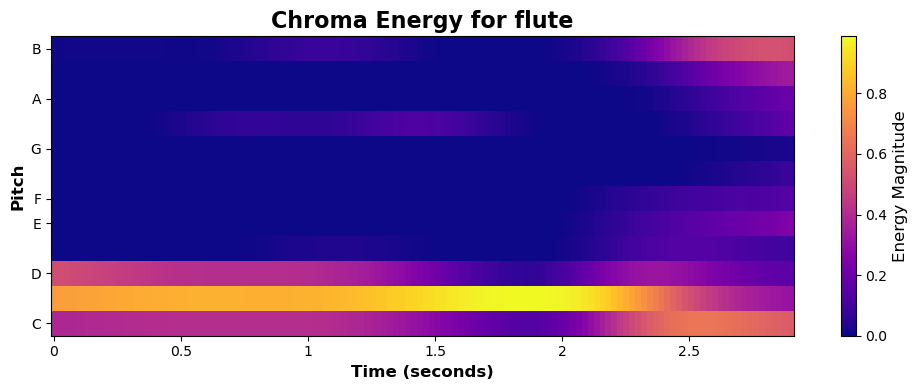

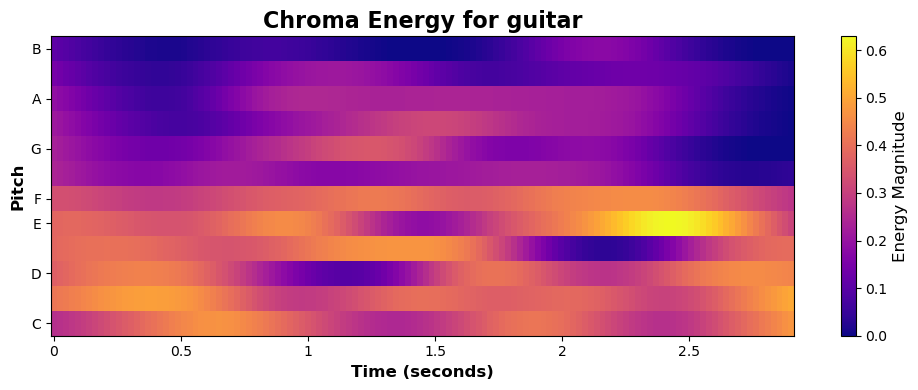

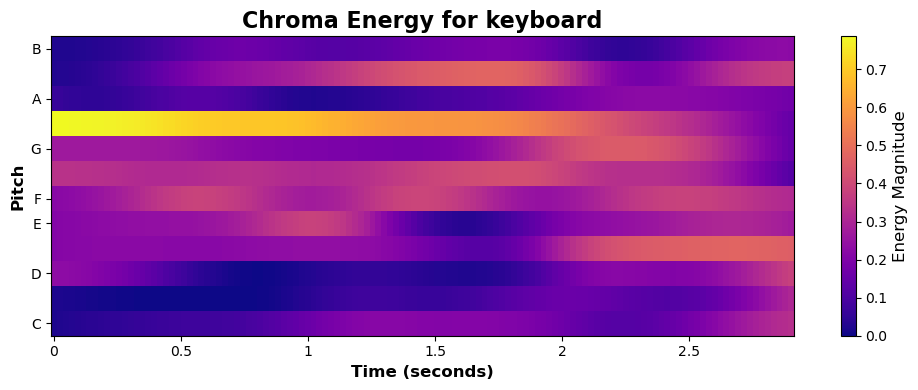

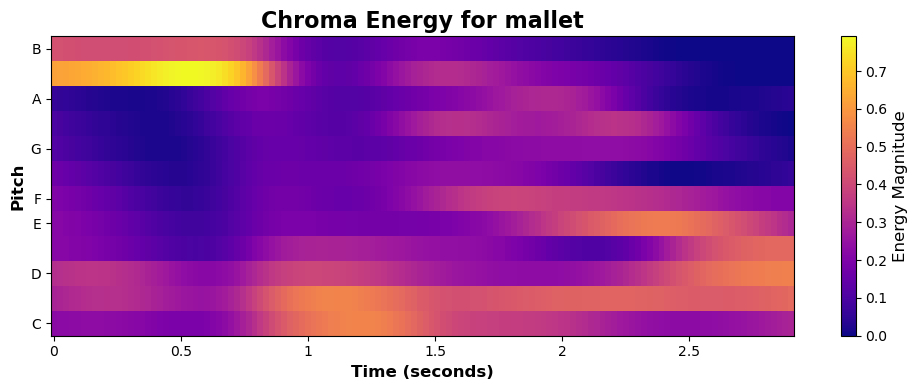

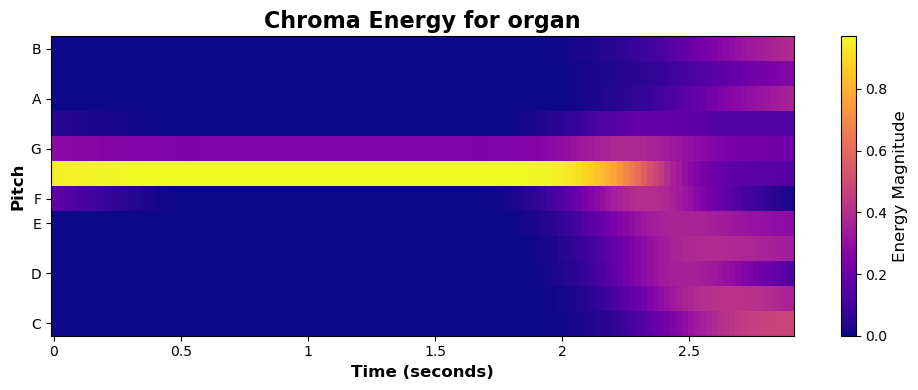

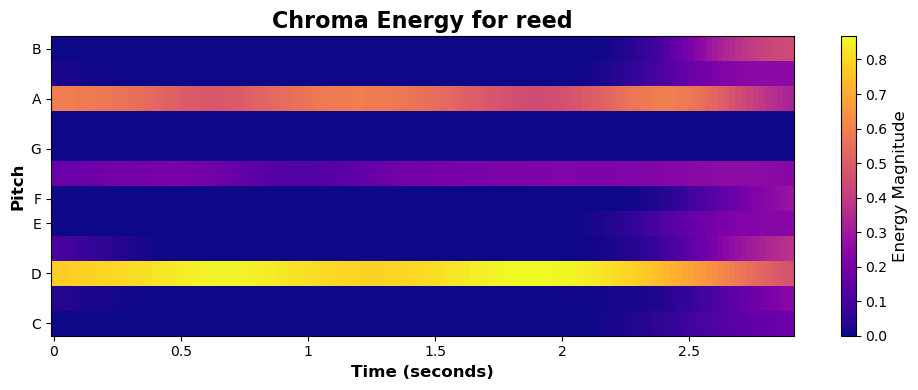

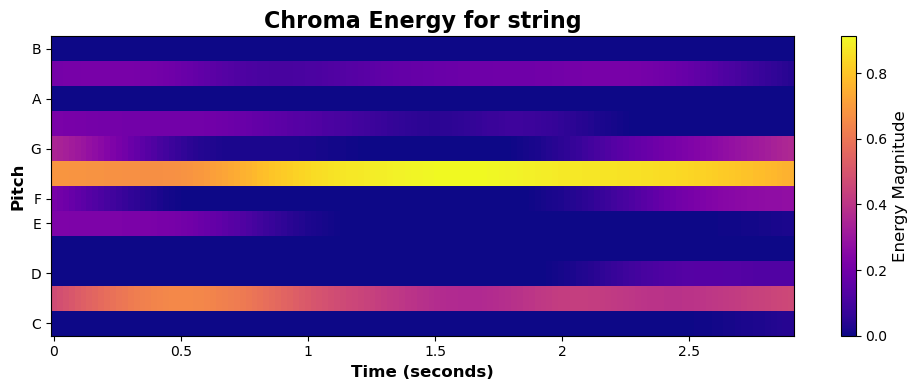

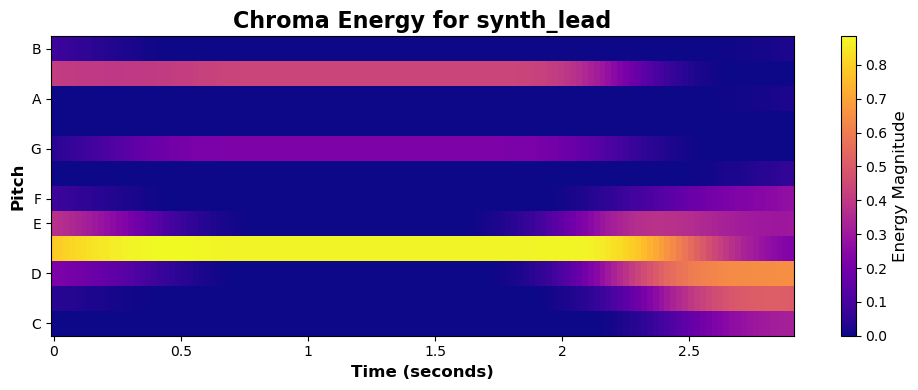

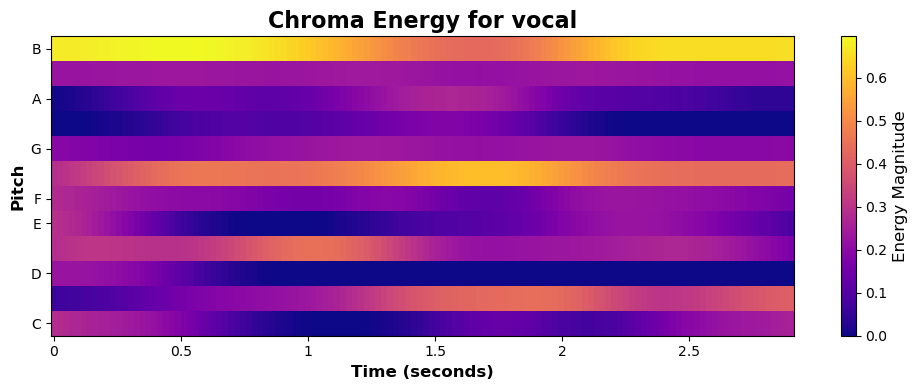

In [38]:
# Assuming 'chromas' and 'class_names' are predefined lists
for chroma, instrument, i in zip(chromas, class_names, range(len(class_names))):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', cmap='plasma')
    
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Energy Magnitude', fontsize=12)
    
    plt.title("Chroma Energy for " + instrument, fontsize=16, fontweight='bold')
    
    plt.xlabel('Time (seconds)', fontsize=12, fontweight='bold')
    plt.ylabel('Pitch', fontsize=12, fontweight='bold')
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.grid(False)  # Turn off grid lines for a cleaner look
    plt.tight_layout()  # Adjust layout to prevent overlapping labels and titles
    
    plt.show()


## MelSpectrogram and Spectrogram of Wav Files

**MelSpectrogram.**

In [25]:
spectrograms_mel = []

for y_, sr_ in zip(y, sr):
    spectrograms_mel.append(librosa.feature.melspectrogram(y=y_, sr=sr_, n_mels=128,fmax=8000))

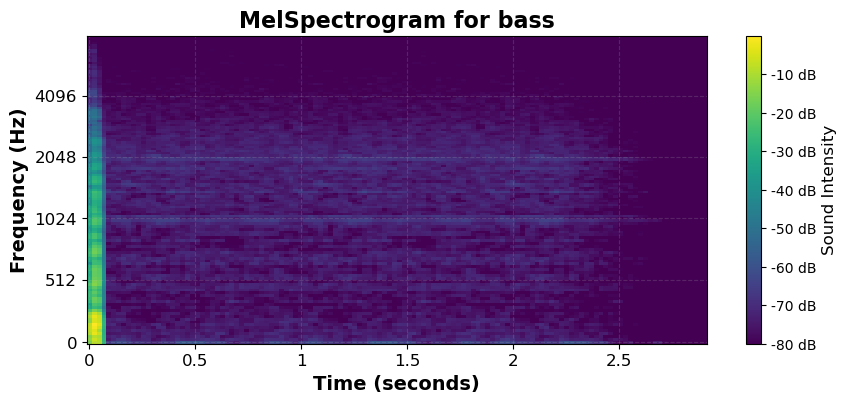

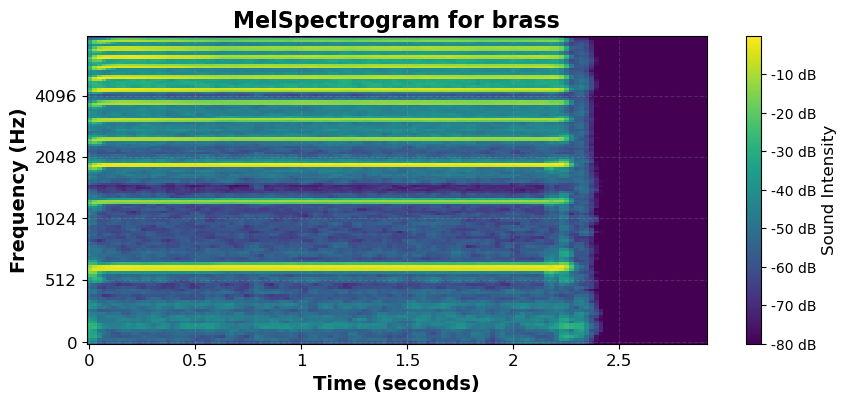

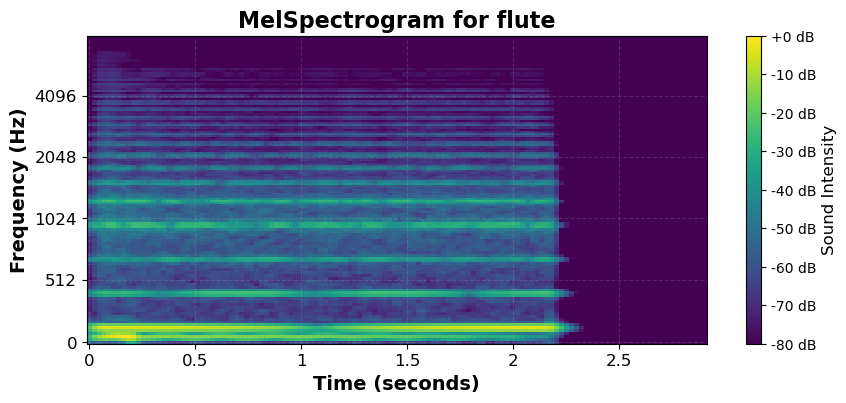

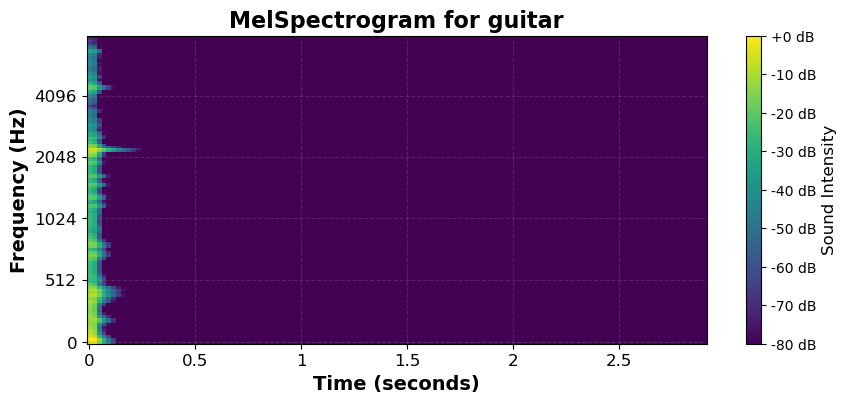

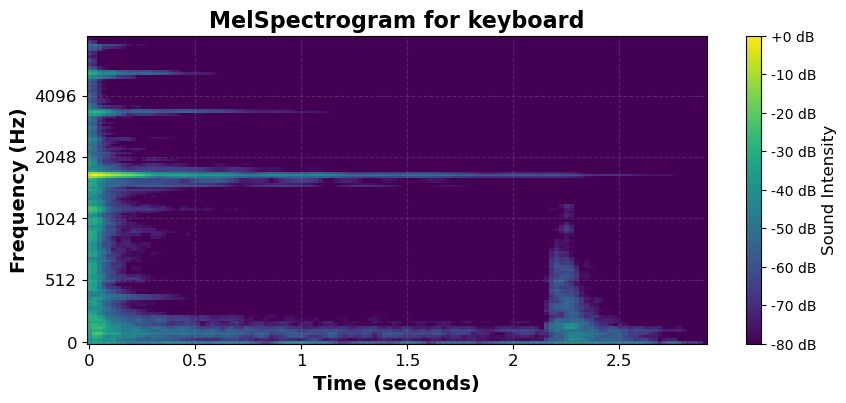

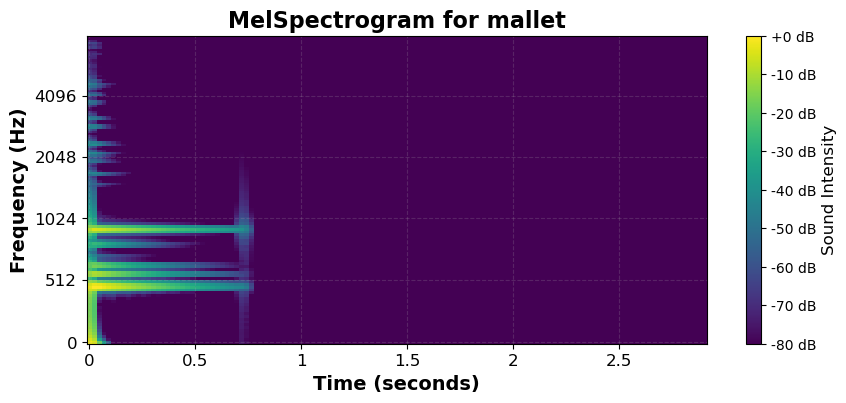

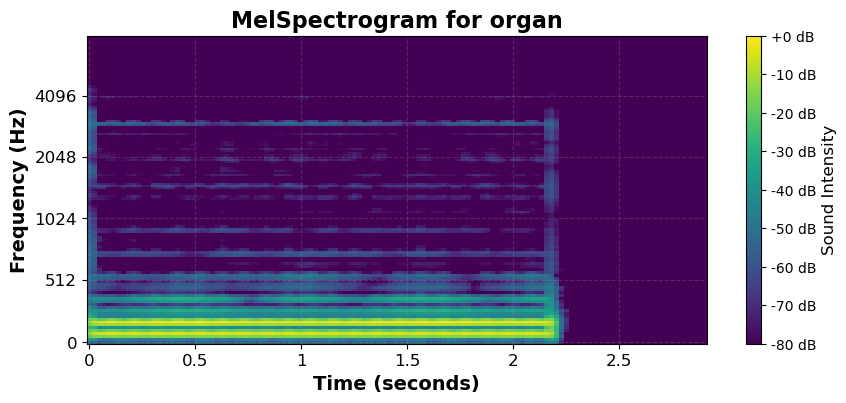

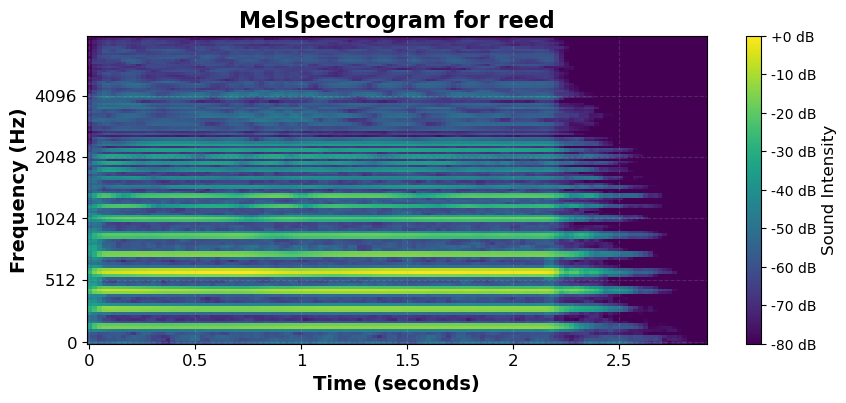

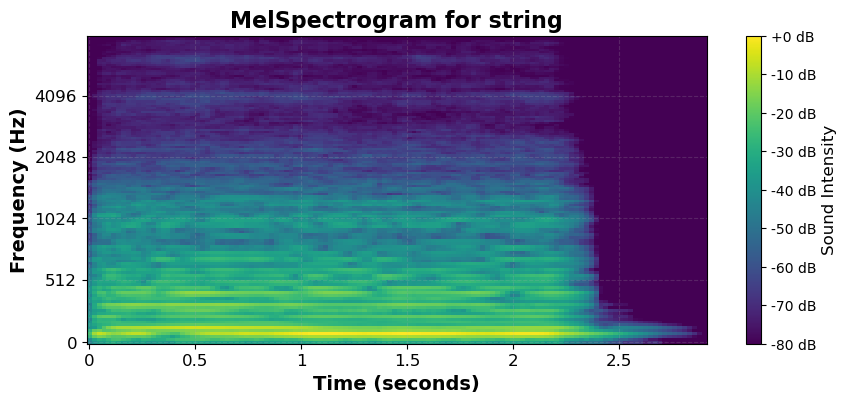

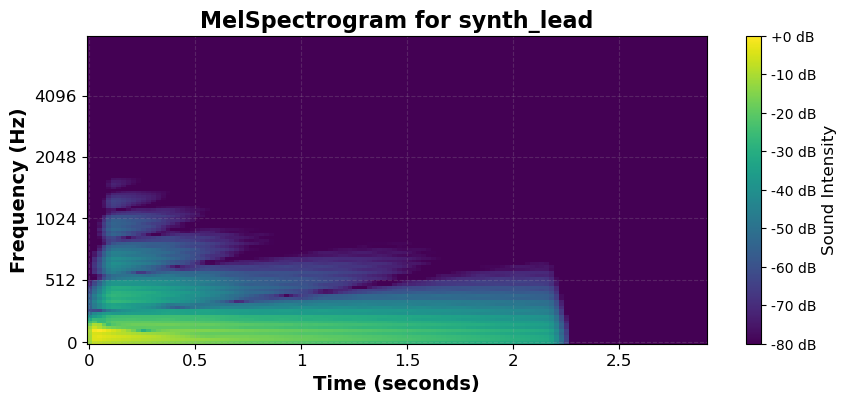

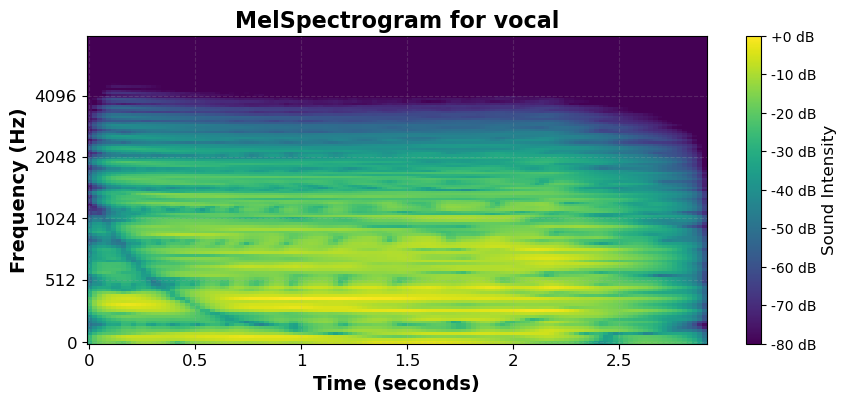

In [26]:
# Iterate through spectrograms, instrument names, and class indices
for S, instrument, i in zip(spectrograms_mel, class_names, range(len(class_names))):
    plt.figure(figsize=(10, 4))
    
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), cmap='viridis',
                             y_axis='mel', fmax=8000, x_axis='time')
    
    cbar = plt.colorbar(format='%+2.0f dB')
        
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Sound Intensity', fontsize=12)
    
    plt.title("MelSpectrogram for " + instrument, fontsize=16, fontweight='bold', color='black')
    
    plt.tick_params(axis='both', which='major', labelsize=12, colors='black')
    
    plt.grid(True, linestyle='--', alpha=0.2)
    
    plt.xlabel('Time (seconds)', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Frequency (Hz)', fontsize=14, fontweight='bold', color='black')
    
plt.show()

**Spectrogram.**

In [27]:
spectrograms = []

for y_, sr_ in zip(y, sr):
    D = np.abs(librosa.stft(y_))
    spectro = librosa.amplitude_to_db(D, ref=np.max)
    spectrograms.append(spectro)

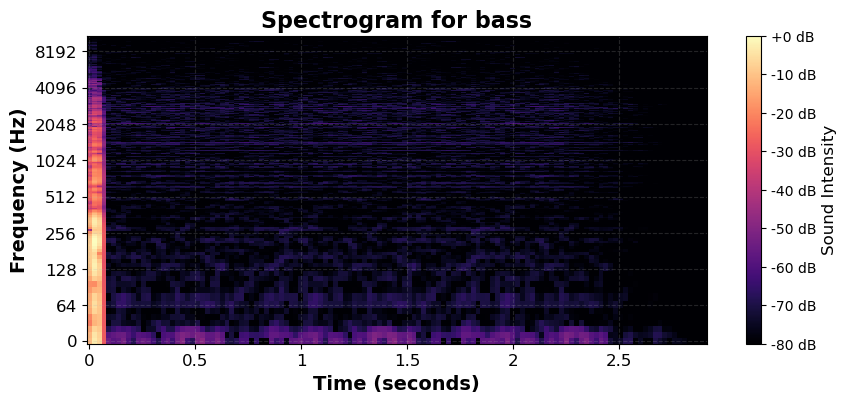

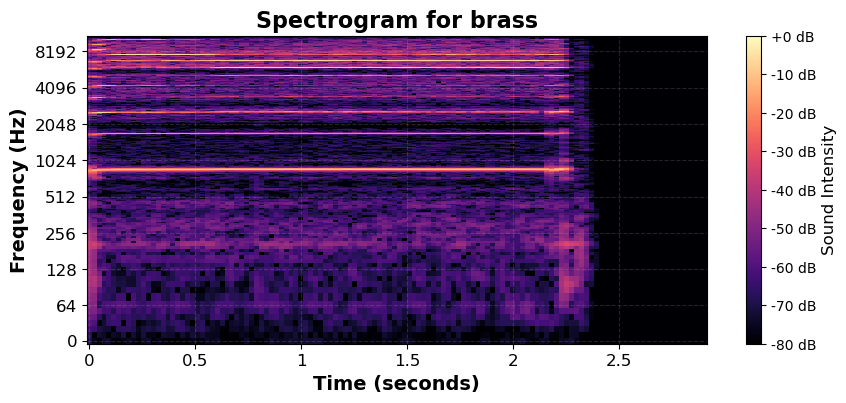

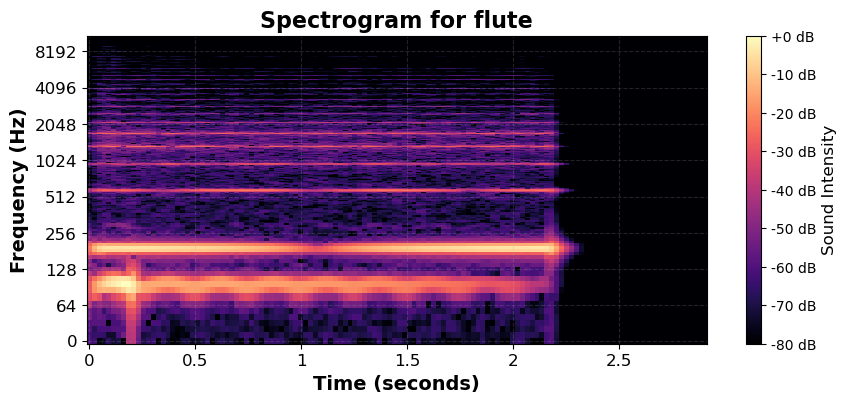

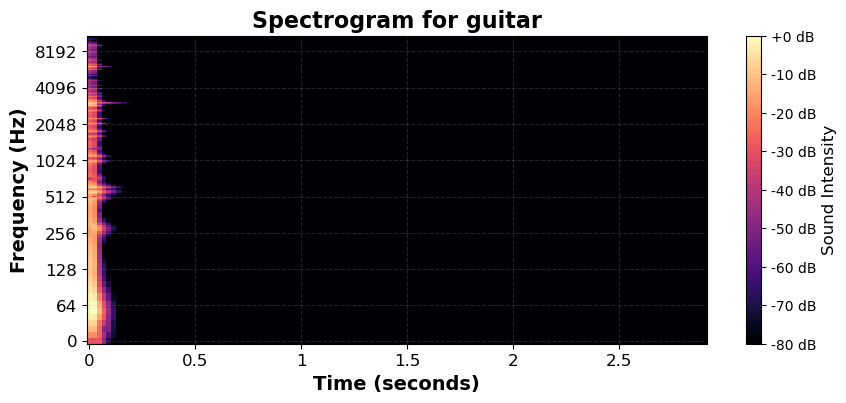

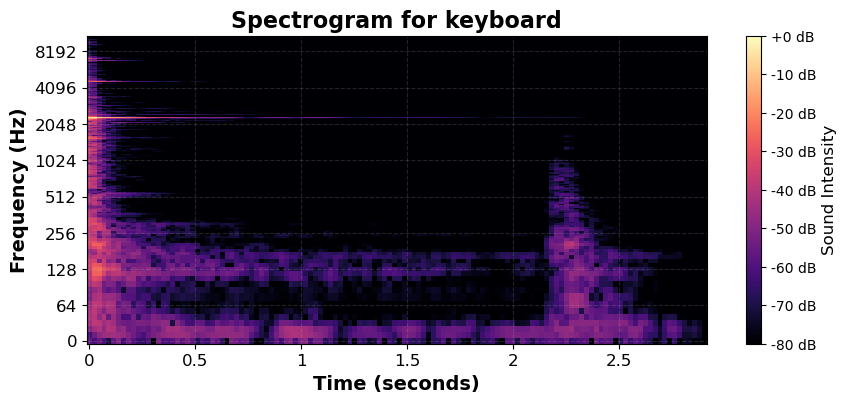

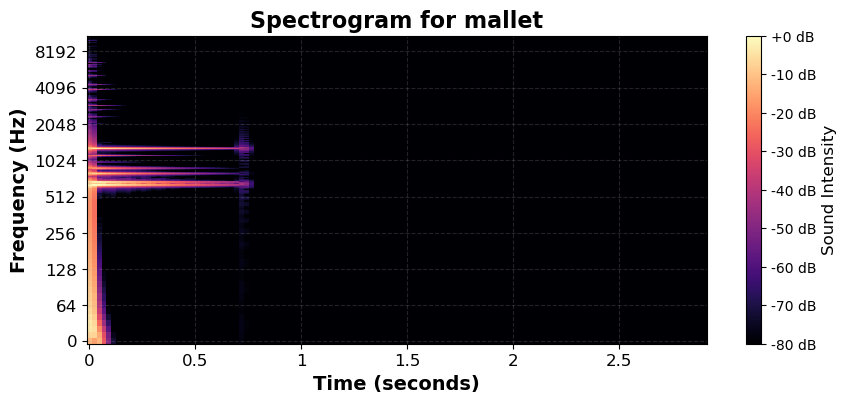

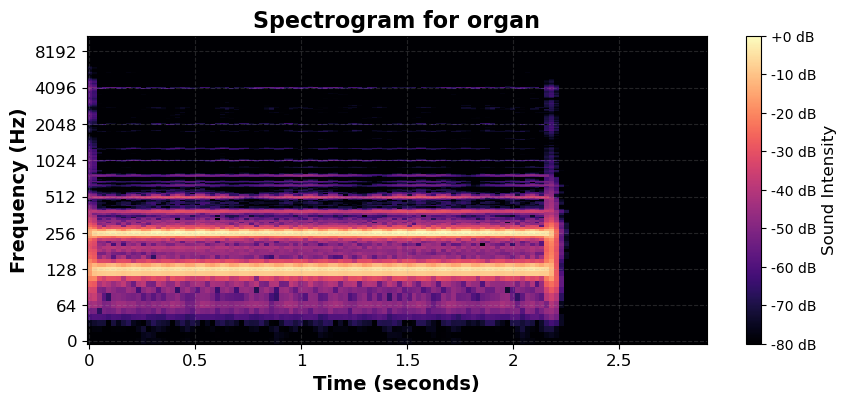

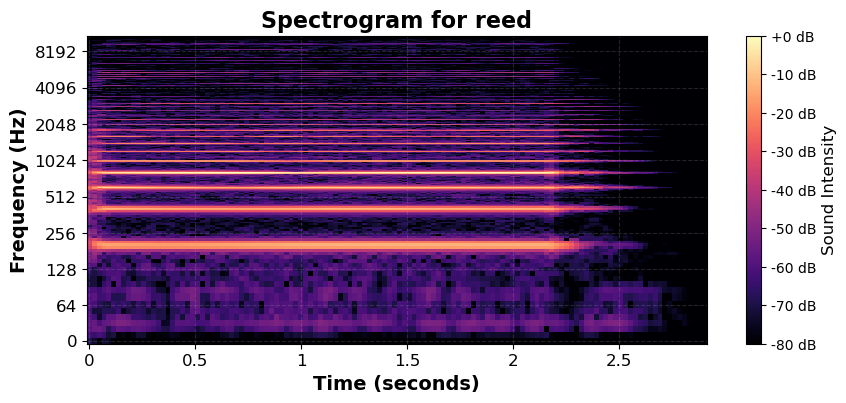

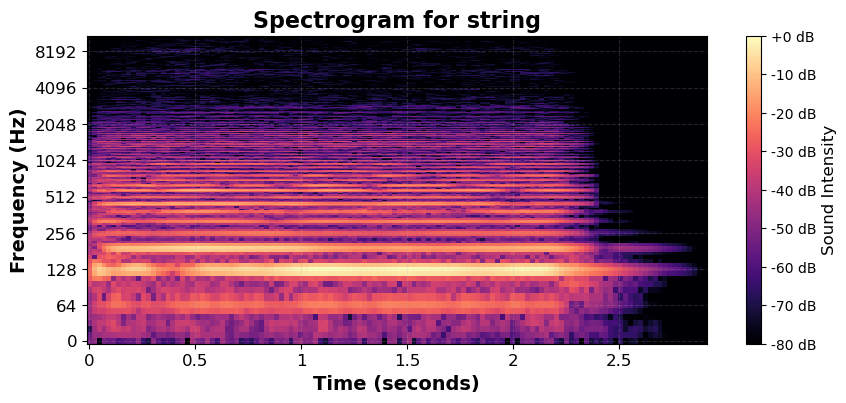

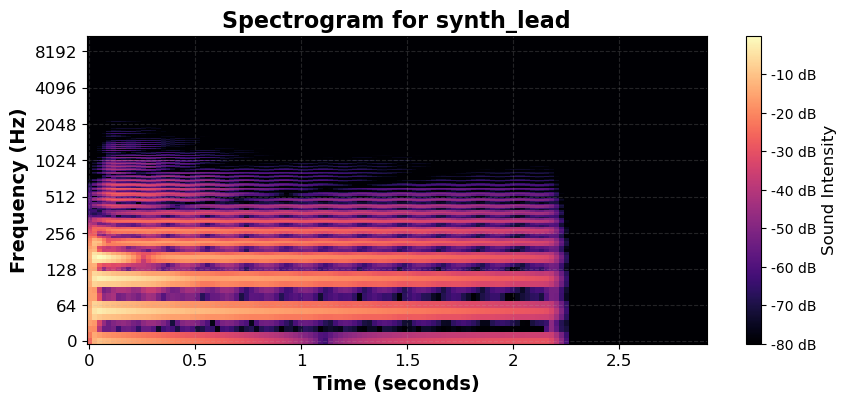

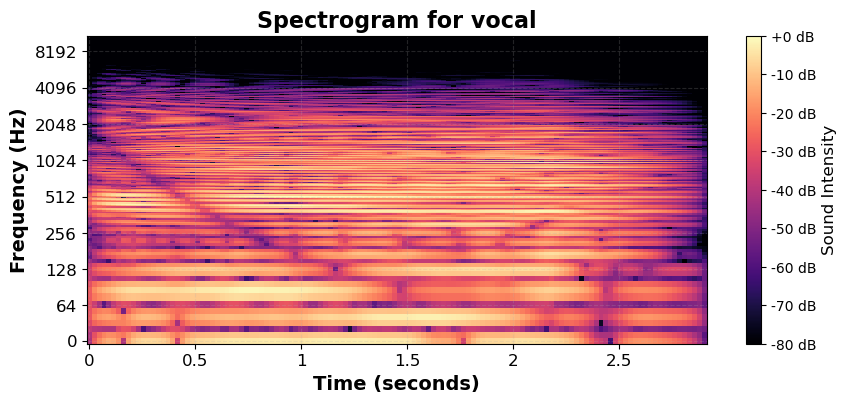

In [28]:
# Iterate through spectrograms, instrument names, and class indices
for S, instrument, i in zip(spectrograms, class_names, range(len(class_names))):
    plt.figure(figsize=(10, 4))
    
    librosa.display.specshow(S, cmap='magma',
                             y_axis='log', fmax=8000, x_axis='time')
    
    cbar = plt.colorbar(format='%+2.0f dB')
        
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Sound Intensity', fontsize=12)
    
    plt.title("Spectrogram for " + instrument, fontsize=16, fontweight='bold', color='black')

    plt.tick_params(axis='both', which='major', labelsize=12, colors='black')
    
    plt.grid(True, linestyle='--', alpha=0.2)
    
    plt.xlabel('Time (seconds)', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Frequency (Hz)', fontsize=14, fontweight='bold', color='black')
    


plt.show()

**MelSpectrogram and Spectrogram combined.**

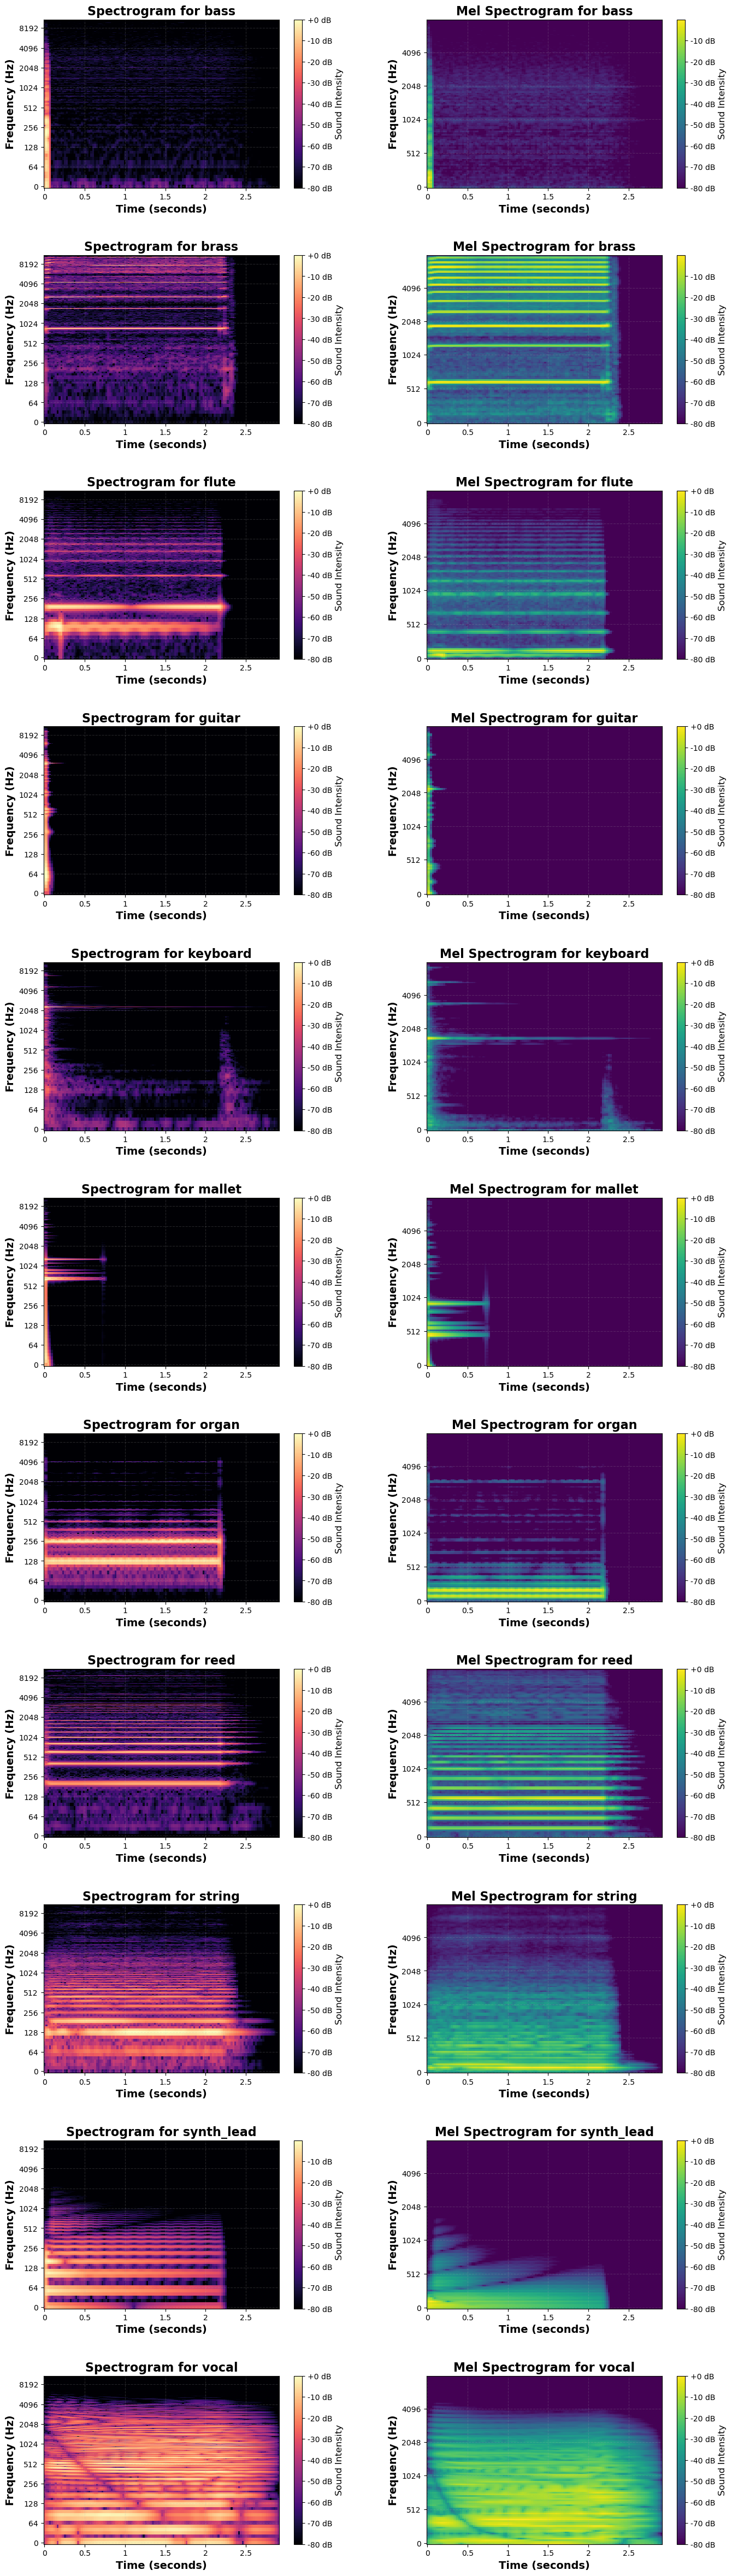

In [29]:
num_instruments = 11

fig, axs = plt.subplots(num_instruments, 2, figsize=(16, 60), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})

# Iterate through each instrument
for i, (instrument, S, S_mel) in enumerate(zip(class_names, spectrograms, spectrograms_mel)):
    # Calculate the subplot row index
    row_index = i % num_instruments
    
    # Plot the regular spectrogram
    img_spectrogram = librosa.display.specshow(S, cmap='magma', y_axis='log', fmax=8000, x_axis='time', ax=axs[row_index, 0])
    axs[row_index, 0].set_title('Spectrogram for ' + instrument, fontsize=16, fontweight='bold')
    axs[row_index, 0].set_xlabel('Time (seconds)', fontsize=14, fontweight='bold')
    axs[row_index, 0].set_ylabel('Frequency (Hz)', fontsize=14, fontweight='bold')
    axs[row_index, 0].grid(True, linestyle='--', alpha=0.2)
    
    # Add colorbar for the spectrogram
    cbar_spectrogram = plt.colorbar(img_spectrogram, ax=axs[row_index, 0], format='%+2.0f dB')
    cbar_spectrogram.ax.tick_params(labelsize=10)
    cbar_spectrogram.set_label('Sound Intensity', fontsize=12)
    
    # Plot the Mel spectrogram
    img_mel_spectrogram = librosa.display.specshow(librosa.power_to_db(S_mel, ref=np.max), cmap='viridis', y_axis='mel', fmax=8000, x_axis='time', ax=axs[row_index, 1])
    axs[row_index, 1].set_title('Mel Spectrogram for ' + instrument, fontsize=16, fontweight='bold')
    axs[row_index, 1].set_xlabel('Time (seconds)', fontsize=14, fontweight='bold')
    axs[row_index, 1].set_ylabel('Frequency (Hz)', fontsize=14, fontweight='bold')
    axs[row_index, 1].grid(True, linestyle='--', alpha=0.2)
    
    # Add colorbar for the Mel spectrogram
    cbar_mel_spectrogram = plt.colorbar(img_mel_spectrogram, ax=axs[row_index, 1], format='%+2.0f dB')
    cbar_mel_spectrogram.ax.tick_params(labelsize=10)
    cbar_mel_spectrogram.set_label('Sound Intensity', fontsize=12)


plt.show()

## Mel-Frequency Cepstral Coefficients of Wav Files

In [30]:
mfccs = []
for y_, sr_ in zip(y, sr):
    mfccs.append(librosa.feature.mfcc(y=y_, sr=sr_, n_mfcc=13))

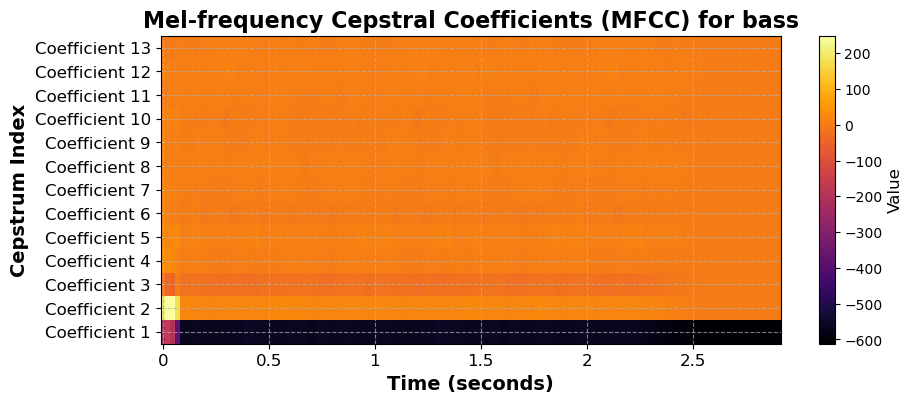

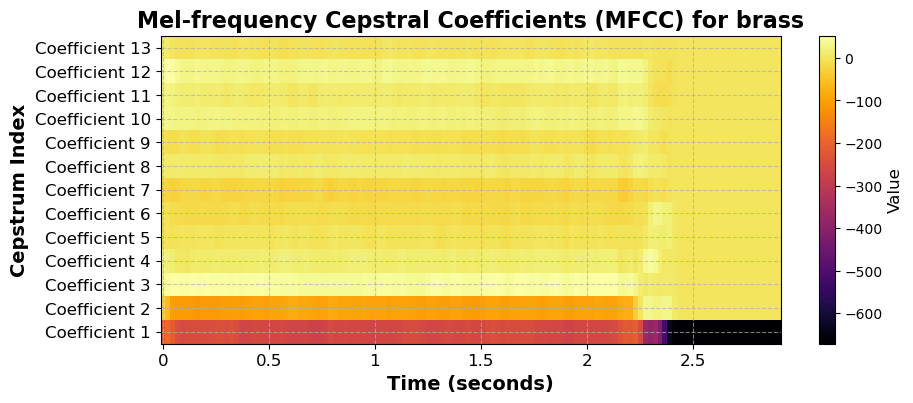

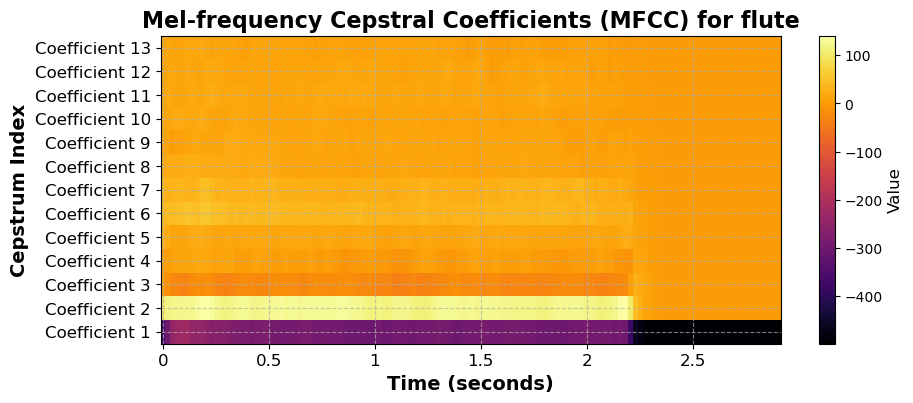

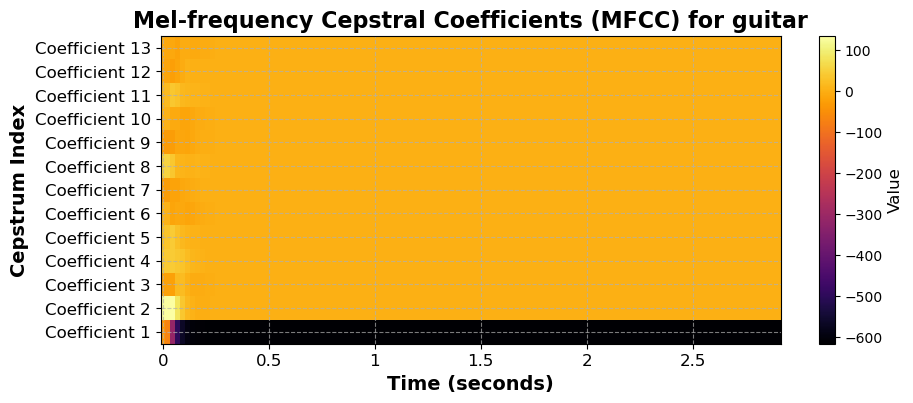

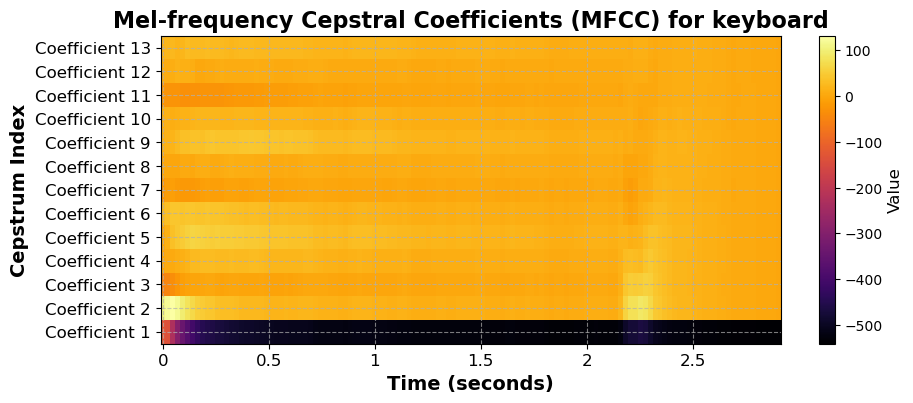

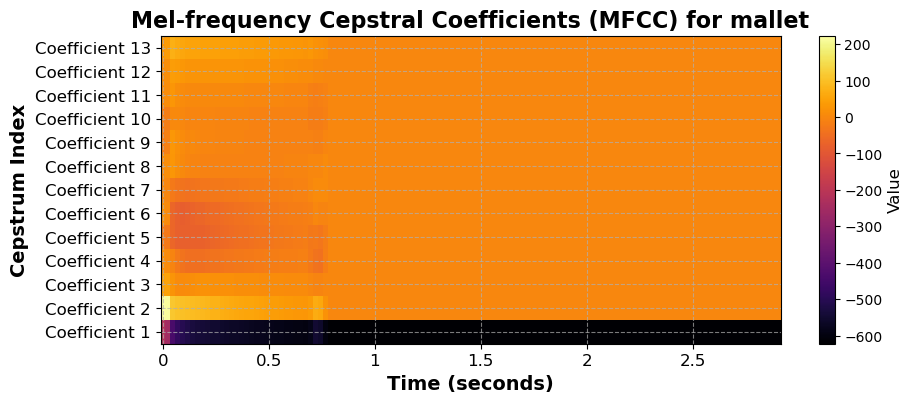

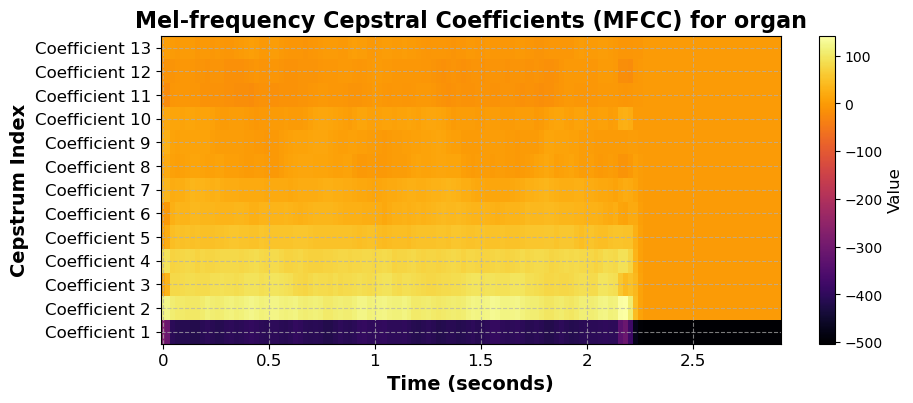

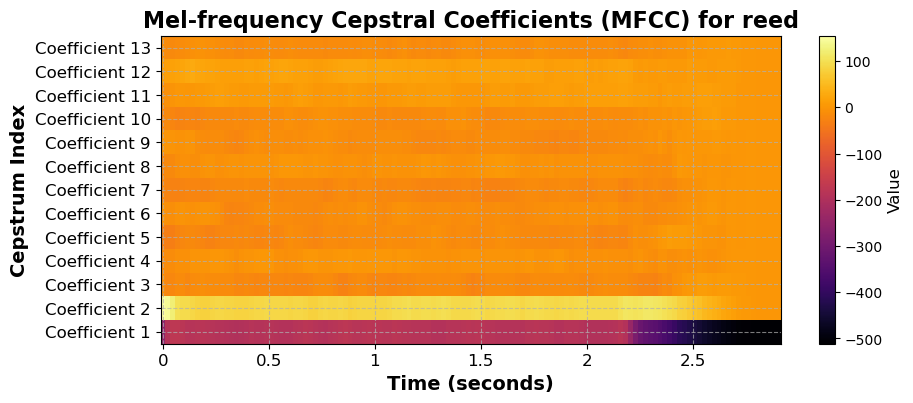

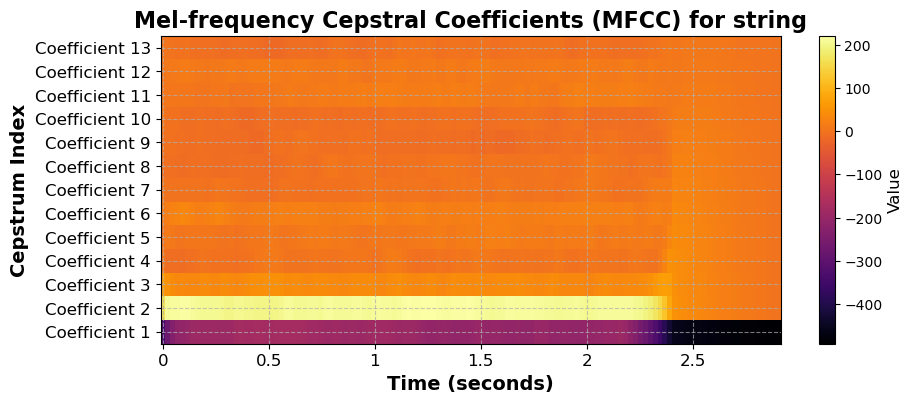

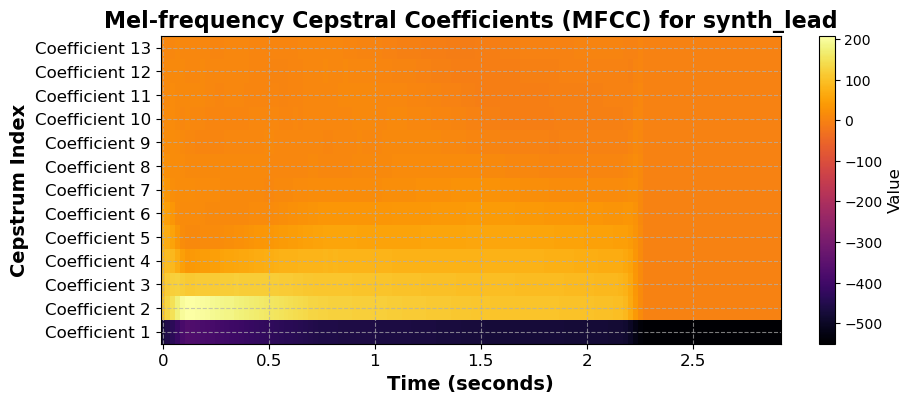

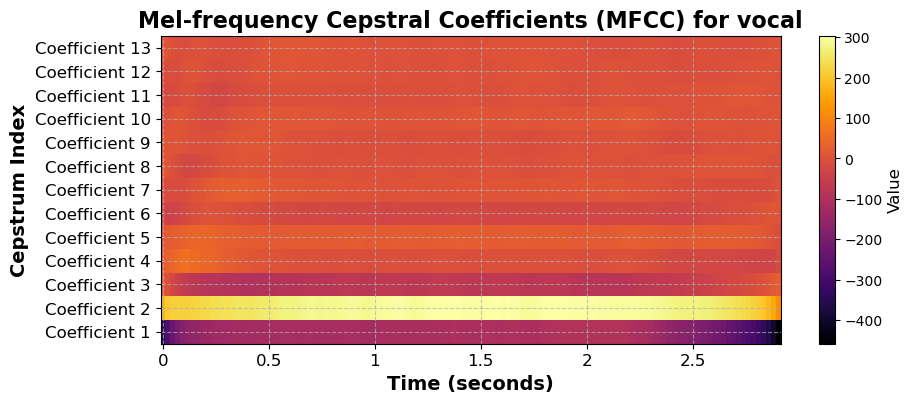

In [36]:
import matplotlib.pyplot as plt
import librosa.display

# Assuming 'mfccs' and 'class_names' are predefined lists
for mfcc, instrument, i in zip(mfccs, class_names, range(len(class_names))):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', cmap='inferno')
    
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Value', fontsize=12)
    
    plt.title('Mel-frequency Cepstral Coefficients (MFCC) for ' + instrument, fontsize=16, fontweight='bold', color='black')
    plt.tick_params(axis='both', which='major', labelsize=12, colors='black')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.xlabel('Time (seconds)', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Cepstrum Index', fontsize=14, fontweight='bold', color='black')

    # Setting y-axis ticks and labels
    num_ceps = mfcc.shape[0]  # Get the number of cepstral coefficients
    y_ticks = range(num_ceps)
    y_labels = [f'Coefficient {n+1}' for n in y_ticks]  # Generate labels for each coefficient
    plt.yticks(y_ticks, y_labels)

plt.show()


## Spectral Contrast of Wav Files

In [32]:
contrasts = []
for y_, sr_ in zip(y, sr):
    contrasts.append(librosa.feature.spectral_contrast(y=y_, sr=sr_))

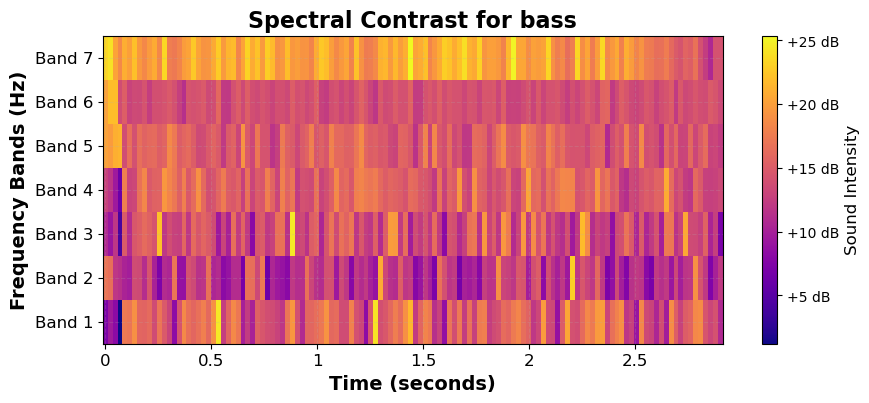

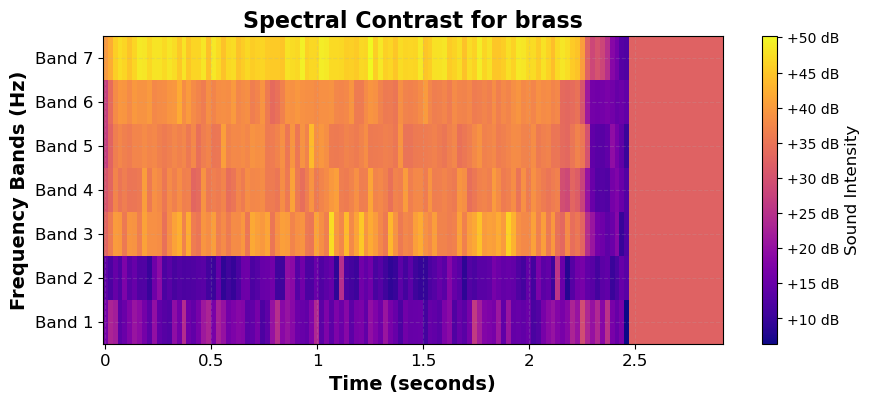

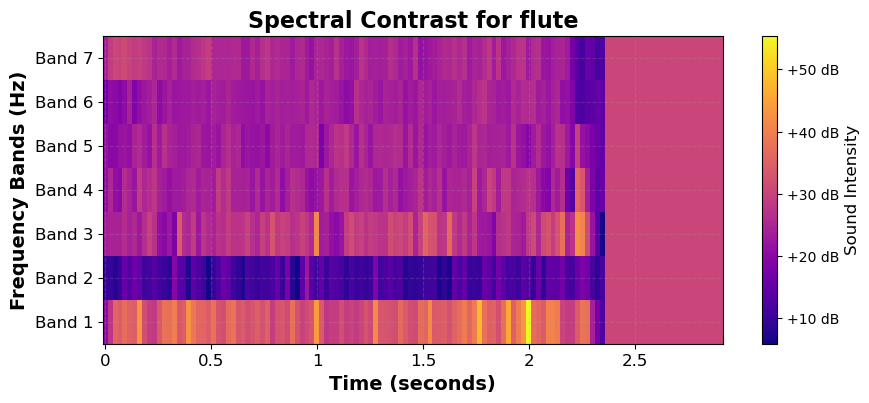

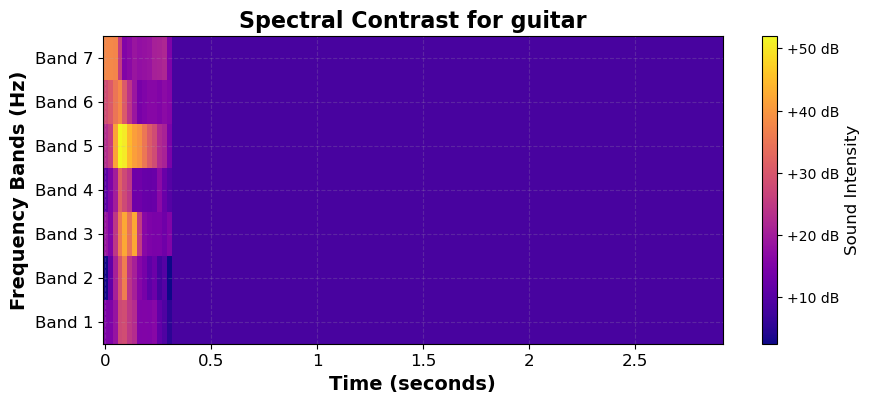

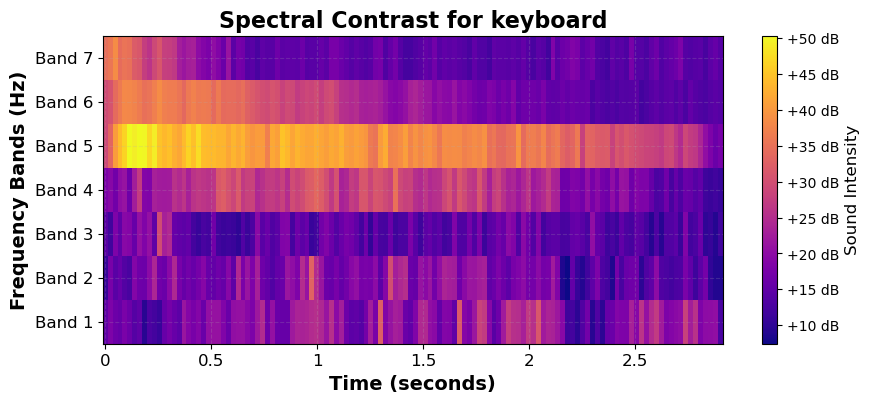

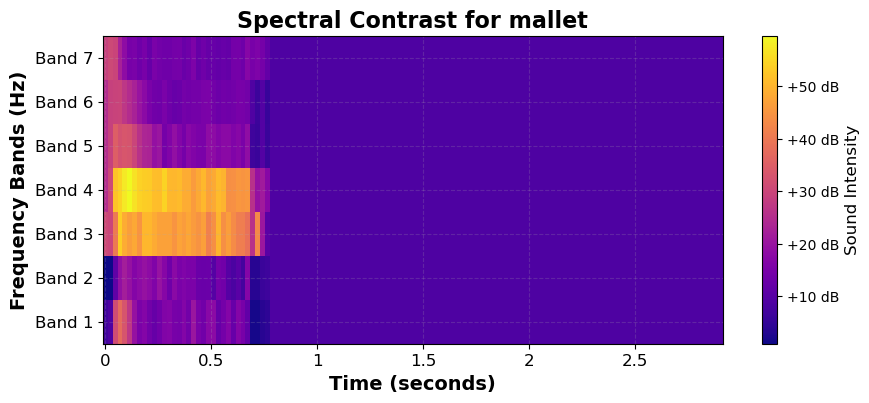

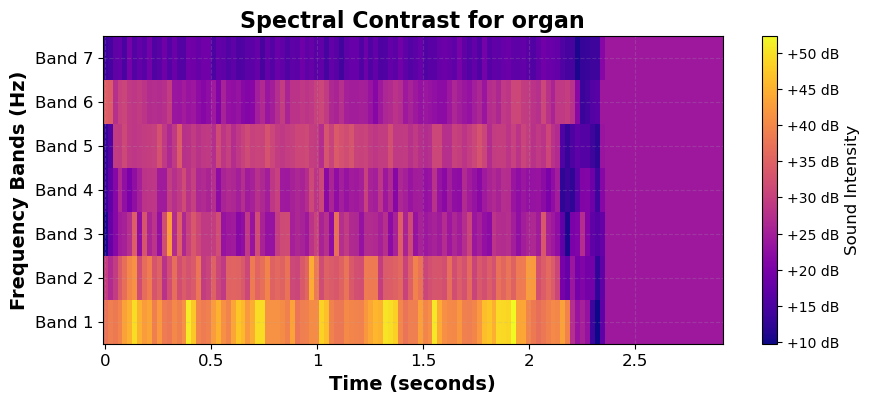

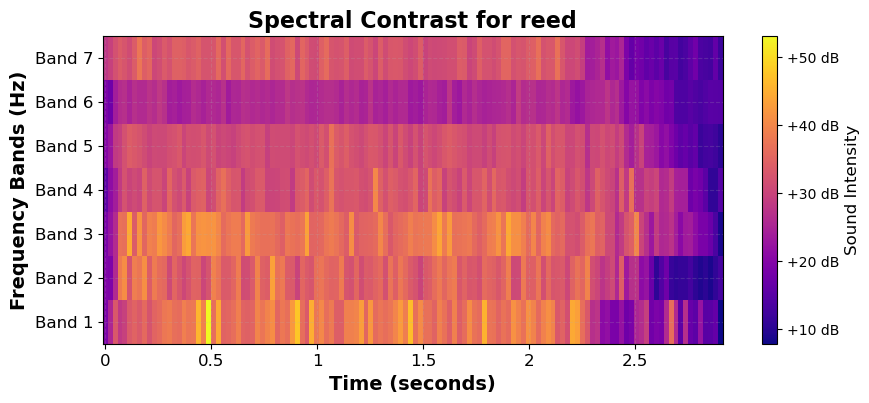

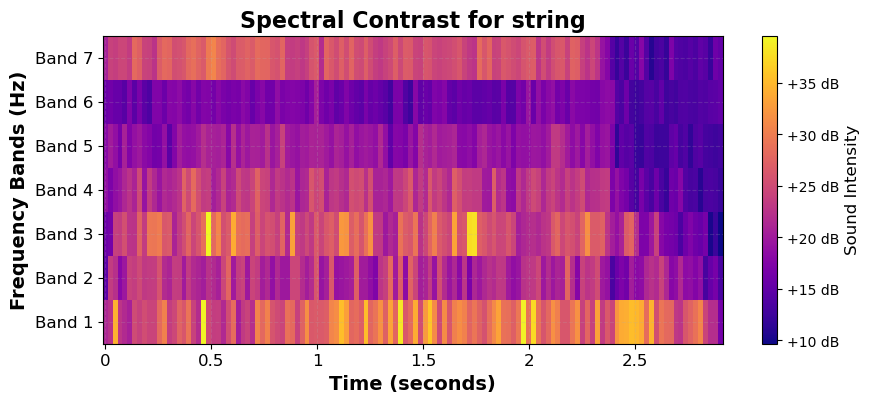

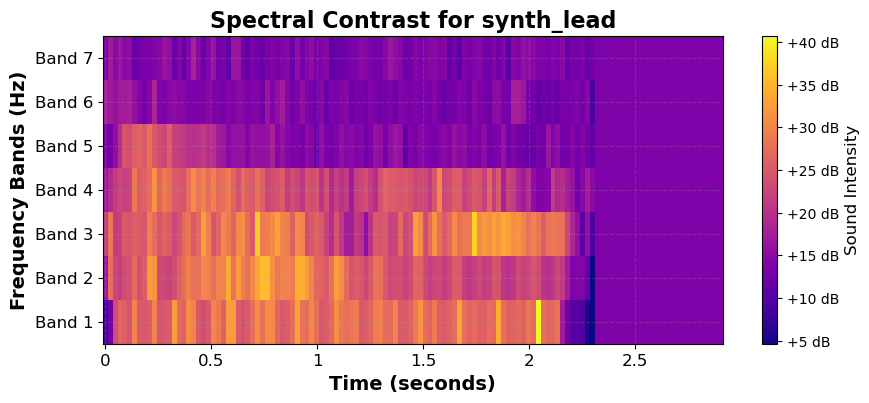

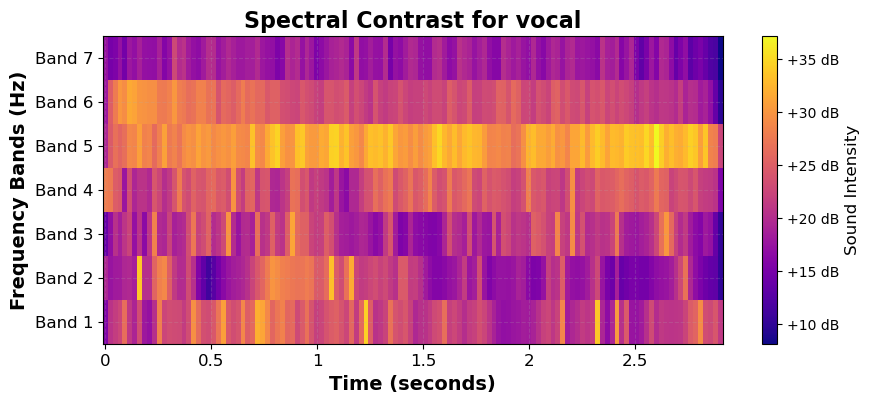

In [35]:
# Assuming 'contrasts' and 'class_names' are predefined lists
for contrast, instrument, i in zip(contrasts, class_names, range(len(class_names))):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(contrast, x_axis='time', cmap='plasma')
    
    cbar = plt.colorbar(format='%+2.0f dB')
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Sound Intensity', fontsize=12)
    
    # Set y-axis label and ticks for 7 bands
    plt.ylabel('Frequency Bands (Hz)', fontsize=14, fontweight='bold', color='black')
    y_ticks = [0, 1, 2, 3, 4, 5, 6]  # Define your frequency band indices for 7 bands
    y_labels = ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7']  # Labels for each band
    plt.yticks(y_ticks, y_labels, fontsize=12)  # Setting y-ticks
    
    plt.title('Spectral Contrast for ' + instrument, fontsize=16, fontweight='bold', color='black')
    plt.tick_params(axis='both', which='major', labelsize=12, colors='black')
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.xlabel('Time (seconds)', fontsize=14, fontweight='bold', color='black')

plt.show()
